In [1]:
import main
import beacon

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import pylab as pl
from sklearn import preprocessing

In [2]:
# boo = beacon.Faction.HonestFaction(74, "Honest", 0.5, 0.1, 0.3)
# poo = beacon.Faction.SmokeFaction(37, "Dishonest", 0.5, 0.1, 0.3)

In [3]:
def plot_game_ratio():
    """
    This function calculates the ratio of 0s and 1s in one game and draws the scatter plot
    """
    
    game = beacon.play(boo, poo)
    
    numberZeros = 0
    ratioZeros = 0
    ratioZeros_list = []
    for n in range(len(game)):
        if game[n][2] == 0:
            numberZeros += 1
        ratioZeros = numberZeros/(n+1)
        ratioZeros_list.append(ratioZeros)
    ratioOnes_list = [1-item for item in ratioZeros_list]
    
    plt.plot(range(111), np.ravel(ratioZeros_list), 'o', color = 'red')
    plt.plot(range(111), np.ravel(ratioOnes_list), 'o', color = 'blue')
    plt.ylabel('ratio')
    plt.xlabel('Number of votes')
    plt.title('The ratio for number of 0s and the ratio for number of 1s in one game')
    plt.legend(('0', '1'))
    
    plt.show()    

In [4]:
def plot_win_lose(n_simulations):
    """
    parameters: the number of games simulated
    
    This function calculates the number of wins and loses in n simulated games and draws the bar plot
    """
    stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]
    
    wins = 0
    for s in stats:
        if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
            wins += 1
        
    result = ('Win', 'Lose')
    y_pos = np.arange(len(result))
    performance = [wins, len(stats)-wins]
    
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.text(-0.05, len(stats)/2, wins)
    plt.text(0.95, len(stats)/2, len(stats)-wins)
    plt.xticks(y_pos, result)
    plt.ylabel('Result')
    plt.title('Number of Win & Lose for n simulated games')
    plt.show()
    
    
    return performance

In [5]:
def win_lose_ratio(n_simulations, n_ratio_compared):
    """
    parameters:
        n_simulations: The number of games simulated to obtain one ratio value
        n_ratio_compared: The number of ratio values
        
    This function calculates the ratio of wins and loses in n_simulations games, 
    then append each ratio (total of n_ratio_compared ratios) to the list
    """
    ratio_list = []
    
    for n in range(n_ratio_compared):
        ratio = 0
        stats = [main.collect_statistics(beacon.play(boo, poo)) for _ in range(n_simulations)]

        wins = 0
        for s in stats:
            if s[0] / (s[1]+s[0]) >= 2/3 or s[1] / (s[0]+s[1]) >= 2/3:
                wins += 1

        ratio = wins/len(stats)
        ratio_list.append(ratio)
    
    return ratio_list

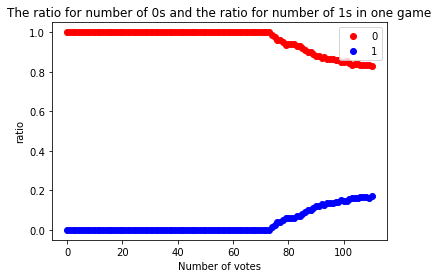

In [11]:
t_vote = 0.5
t_attack = 0.5
error = 0
latency = 0

boo = beacon.Faction.HonestFaction(74, "Honest", t_vote, error, latency)
poo = beacon.Faction.SmokeFaction(37, "Dishonest", t_attack, error, latency)
plot_game_ratio()

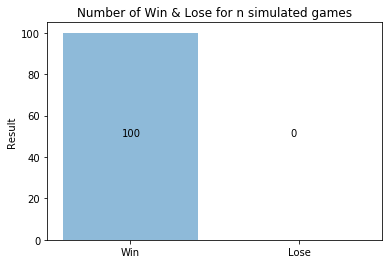

[100, 0]

In [12]:
plot_win_lose(100)

In [13]:
win_lose_ratio = win_lose_ratio(10, 10)

TypeError: 'list' object is not callable

In [14]:
win_lose_ratio

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [15]:
st.t.interval(0.95, len(win_lose_ratio)-1, loc=np.mean(win_lose_ratio), scale=st.sem(win_lose_ratio))

/Users/GeorgeQiao/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1920: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/Users/GeorgeQiao/anaconda/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1921: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


(nan, nan)